# FID Calculation

In [ ]:
from cleanfid import fid
import os

def calculate_fid_for_steps(generated_base_dir, validation_dir):
    results = {} 
    step_dirs = sorted([d for d in os.listdir(generated_base_dir) if os.path.isdir(os.path.join(generated_base_dir, d))])

    for step_dir in step_dirs:
        step_path = os.path.join(generated_base_dir, step_dir)
        print(f"Calculating FID for {step_dir}...")

        # Compute FID score
        fid_score = fid.compute_fid(step_path, validation_dir)
        results[step_dir] = fid_score

        print(f"FID for {step_dir}: {fid_score}")

    return results

# Example usage
generated_base_dir = "out/unet_sm_500/sample"  # Replace with your generated images base directory
validation_dir = "data/AFHQ/train/test"   # Replace with your validation images directory

# Calculate FID scores for all steps
fid_results = calculate_fid_for_steps(generated_base_dir, validation_dir)

# Print results
for step, score in fid_results.items():
    print(f"Step: {step}, FID: {score}")

# Image Collage

['FastDiffusion.py/out/test/sample/step0004/img_000.png', 'FastDiffusion.py/out/test/sample/step0008/img_000.png', 'FastDiffusion.py/out/test/sample/step0016/img_000.png', 'FastDiffusion.py/out/test/sample/step0032/img_000.png', 'FastDiffusion.py/out/test/sample/step0064/img_000.png', 'FastDiffusion.py/out/test/sample/step0128/img_000.png']


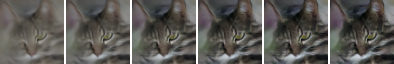

In [8]:
from PIL import Image
import os

# Define the directory containing the images and the steps to compare
image_dir = "FastDiffusion.py/out/test/sample"  # Replace with your directory path
steps = [4, 8, 16, 32, 64, 128]
border_size = 2  # Border thickness in pixels
border_color = (255, 255, 255)  # White border (RGB format)

# Prepare the image paths
image_paths = [os.path.join(image_dir, f"step{str(step).zfill(4)}","img_000.png") for step in steps]
print(image_paths)

# Check if all images exist
for path in image_paths:
    if not os.path.exists(path):
        raise FileNotFoundError(f"Image not found: {path}")

# Open and load all images
images = [Image.open(path) for path in image_paths]

# Ensure all images have the same size for proper alignment
width, height = images[0].size
for img in images:
    if img.size != (width, height):
        raise ValueError("All images must have the same dimensions")

# Create a new blank image for the comparison (side-by-side)
total_width = width * len(images) + border_size * (len(images) - 1)
comparison_image = Image.new("RGB", (total_width, height), border_color)

x_offset = 0
for img in images:
    comparison_image.paste(img, (x_offset, 0))
    x_offset += width + border_size  # Shift position by image width + border size

# Save and display the comparison image
comparison_image.save(os.path.join(image_dir, "comparison.png"))
comparison_image.show()
